In [3]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics as ms
from sklearn.datasets import fetch_openml
import pickle

In [4]:
mnist_digits = fetch_openml('mnist_784', version=1)
mnist_digits.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
x = mnist_digits["data"]
y = mnist_digits["target"]

In [6]:
x.shape , y.shape

((70000, 784), (70000,))

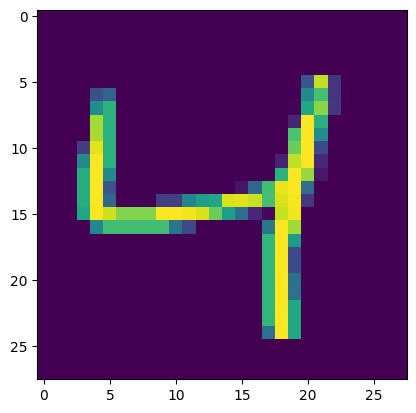

In [7]:
sample_a = x.loc[[2]].to_numpy()
sample_b = x.loc[[25]].to_numpy()

sample_a_img = sample_a.reshape(28, 28)
sample_b_img = sample_b.reshape(28, 28)

plt.imshow(sample_a_img) 

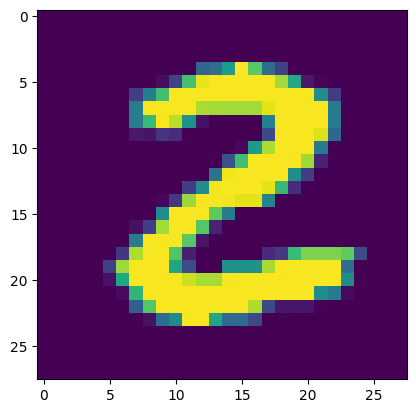

In [8]:
plt.imshow(sample_b_img)

In [9]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [11]:
model = SGDClassifier(random_state=42)
model.fit(x_train, y_train) 

SGDClassifier(random_state=42)

In [12]:
a = cross_val_score(model, x_test, y_test, cv=3, scoring="accuracy")

In [13]:
a

array([0.82783443, 0.85448545, 0.8919892 ])

<Axes: >

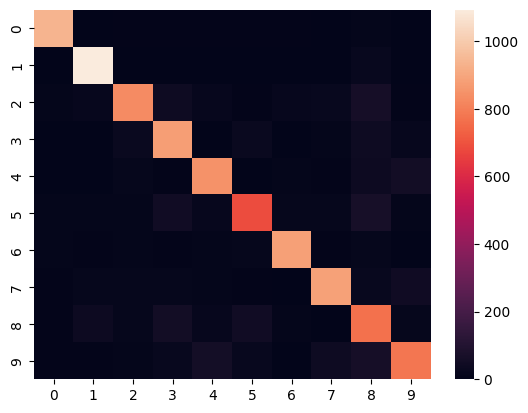

In [14]:
y_test_pred = cross_val_predict(model, x_test, y_test, cv=3)
c = confusion_matrix(y_test, y_test_pred)
sns.heatmap(c, annot=False)

In [15]:
pickle.dump(model, open('mnist_sgd.pkl', 'wb')) 